# Analyzing SSP Temperature and Precipitation Data from CPIM6 Model

Welcome to this Jupyter Notebook for analyzing climate data from the IPSL-CM6A-LR model, specifically focusing on Shared Socioeconomic Pathways (SSP) temperature and precipitation data. In this notebook, we will explore and visualize climate data obtained from the Climate Data Store (CDS), focusing on the CPIM6 model.

## Table of Contents
1. [Introduction to Climate Data Store](#introduction)
2. [Data Retrieval](#data-retrieval)
3. [Data Exploration](#data-exploration)
4. [Data Analysis](#data-analysis)
5. [Visualization](#visualization)

<div id="introduction"></div>

## 1. Introduction to Climate Data Store (CDS)

The Climate Data Store is a comprehensive platform that provides access to a wide range of climate data, including climate models, historical observations, and future projections. It's a valuable resource for researchers, scientists, and policymakers working with climate-related data.

In this notebook, we will focus on data from the IPSL-CM6A-LR model, a climate model developed by the Institut Pierre-Simon Laplace (IPSL) in France. Specifically, we will analyze data related to temperature and precipitation under various Shared Socioeconomic Pathways (SSP). These pathways represent different scenarios of human development and greenhouse gas emissions, making them crucial for studying the impacts of climate change under various conditions.

<div id="data-retrieval"></div>

In [1]:
# Import Dependencies
import netCDF4 as nc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Retrieval

Before we can begin our analysis, we need to retrieve the necessary data from the Climate Data Store. We'll use Python and CDS API to access the data. Make sure you have the required Python libraries installed and your CDS API credentials ready.

In [2]:
# A function for opening and reading the .nc files
def read_file(filepath: str):
    """
    Opens and reads a NetCDF file (.nc).
    
    Parameters:
        filepath (str): The path to the NetCDF file to be opened and read.
        
    Returns:
        netCDF4.Dataset: A NetCDF dataset object containing the data from the file.
        
    Example:
        file_path = "example.nc"
        dataset = open_readfile(file_path)
        # Now you can work with the dataset object, e.g., access variables, dimensions, etc.
    """
    nc_file = filepath
    dataset = nc.Dataset(nc_file, 'r')  # 'r' for read mode

    return dataset

## 3. Data Exploration

Once we have obtained the data, we will start by exploring it. We will examine its structure, dimensions, and metadata. Understanding the data is essential before diving into analysis.

<div id="data-analysis"></div>

In [3]:
# Explore the dimension, variable and items in a NetCDF dataset
def explore_dataset(dataset:object):
    """
    Explores and prints information about the variables, items, and dimensions of a NetCDF dataset.

    Parameters:
        dataset (object): A NetCDF dataset object. This should be an open NetCDF4 Dataset object
                      that you want to explore.

    Returns:
        None

    Example:
        # Assuming 'dataset' is an open NetCDF4 Dataset object
        explore_dataset(dataset)
    """

    dimensions = dataset.dimensions
    for dim_name, dim_obj in dimensions.items():
        print(f"Dimension: {dim_name}, Size: {len(dim_obj)}")
    variables = dataset.variables
    for var_name, var_obj in variables.items():
        print(f"Variable name: {var_name}, Shape: {var_obj.shape}")

## 4. Data Analysis

In this section, we will perform various analyses on the SSP temperature and precipitation data from the CPIM6 model. We will calculate statistics, trends, and anomalies to gain insights into climate patterns and changes.

<div id="visualization"></div>

In [4]:
# Extract data from the dataset and return 
def extract_data(dataset:object, var:str, var_column:str):
    """
    Extracts data from a NetCDF dataset and constructs a DataFrame.
    
    Parameters:
        dataset (object): A NetCDF dataset object.
        var (str): The variable name to extract from the dataset.
        var_column (str): The column name to use in the DataFrame.
        
    Returns:
        pd.DataFrame: A DataFrame containing the extracted data.

    """
    # Access latitude and longitude arrays
    lats = dataset.variables['lat'][:]
    lons = dataset.variables['lon'][:]

    # Access time variable and convert to datetime objects
    time_var = dataset.variables['time']
    times = nc.num2date(time_var[:], units=time_var.units)

    # Access specific data for the selected latitude, longitude, and time indices
    selected_data = dataset.variables[var][:]

    # Create a multi-index for the DataFrame using latitude, longitude, and time
    index = pd.MultiIndex.from_product([lats, lons, times], names=['lat', 'lon', 'time'])

    # Flatten the selected_data_celsius array to match the length of the multi-index
    selected_data_flattened = selected_data.reshape(-1)

    # Create the DataFrame
    dataframe = pd.DataFrame({var_column: selected_data_flattened}, index=index)

    return dataframe

In [5]:
# Add needed information to metadata
def add_metadata_to_dataframe(dataframe:pd.DataFrame, ssp:str):
    """
    Adds metadata columns for year and SSP to a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame to which metadata will be added.
        ssp (str): The SSP value to be populated in the "SSP" column.

    Returns:
        pd.DataFrame: The DataFrame with added metadata columns.

    Example:
        df = pd.DataFrame(...)  # Create or load your DataFrame
        df_with_metadata = add_metadata_to_dataframe(df, 'year', 'SSP1-1.6')
    """
    # Extract the year from the datetime index and add it as a separate column
    dataframe['year'] = [time.year for time in dataframe.index.get_level_values('time')]
    dataframe['month'] = [time.strftime('%b') for time in dataframe.index.get_level_values('time')]
    # Create a new column "SSP"
    dataframe['SSP'] = ssp
    return dataframe

Extract Temperature Data for all Shared Socioeconomic Pathways Scenarios (SSP1-1.6, SSP1-2.6, SSP2-4.5, SSP3-7.0, SSP4-6.0, SSP5-8.5)

In [6]:
nc_filepaths = [
    '/Users/margretazuma/Desktop/climate_centre_data_analysis/data/ts_Amon_IPSL-CM6A-LR_ssp119_r1i1p1f1_gr_20150116-20991216_v20190410.nc',
    '/Users/margretazuma/Desktop/climate_centre_data_analysis/data/ts_Amon_IPSL-CM6A-LR_ssp126_r1i1p1f1_gr_20150116-20991216_v20190903.nc',
    '/Users/margretazuma/Desktop/climate_centre_data_analysis/data/ts_Amon_IPSL-CM6A-LR_ssp245_r1i1p1f1_gr_20150116-20991216_v20190119.nc',
    '/Users/margretazuma/Desktop/climate_centre_data_analysis/data/ts_Amon_IPSL-CM6A-LR_ssp370_r1i1p1f1_gr_20150116-20991216_v20190119.nc',
    '/Users/margretazuma/Desktop/climate_centre_data_analysis/data/ts_Amon_IPSL-CM6A-LR_ssp460_r1i1p1f1_gr_20150116-20991216_v20190506.nc',
    '/Users/margretazuma/Desktop/climate_centre_data_analysis/data/ts_Amon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_20150116-20991216_v20190903.nc'
                ]
ssps = {
    'SSP119': None,
    'SSP126': None,
    'SSP245': None,
    'SSP370': None,
    'SSP460': None,
    'SSP585': None
}
for i, file in enumerate(nc_filepaths):
    dataset = read_file(file)
    df = extract_data(dataset, 'ts', 'tmp')
    ssp_key = list(ssps.keys())[i]  # Get the SSP key for the current iteration
    ssps[ssp_key] = add_metadata_to_dataframe(df, ssp_key)
    ssps[ssp_key]['tmp'] -= 273.15 # Convert from Kevin to Celsius

df = pd.concat(ssps.values(), ignore_index=False)

Group the data according to SSP and year range. This is important to examine the temporal trend of each SSP

In [9]:
# Define the year ranges
year_ranges = {
    (2015, 2022): '2015–2022',
    (2023, 2039): '2023–2039',
    (2040, 2059): '2040–2059',
    (2060, 2079): '2060–2079',
    (2080, 2099): '2080–2099'
}

# List of desired percentiles
percentiles = [10, 50, 90]

# Function to calculate percentiles
def calculate_percentiles(data):
    return np.percentile(data, percentiles)

# Create a new column in the DataFrame for the corresponding year range label
df['Year Range'] = pd.cut(df['year'], bins=[key[0] for key in year_ranges.keys()] + [2099], labels=year_ranges.values())

# Group data by SSP and year range
df_grouped = df.groupby(['SSP', 'Year Range'])

# Calculate percentiles for each group
result = df_grouped['tmp'].apply(calculate_percentiles).apply(pd.Series).reset_index()

# Rename columns
result.columns = ['SSP', 'Year Range', '10th', '50th', '90th']

print(result.tail(10))


       SSP Year Range       10th       50th       90th
20  SSP460  2015–2022  25.780856  28.167664  31.947128
21  SSP460  2023–2039  25.769696  28.197617  32.022815
22  SSP460  2040–2059  25.907684  28.240219  31.867386
23  SSP460  2060–2079  25.952490  28.237625  32.050885
24  SSP460  2080–2099  25.927792  28.208023  32.051541
25  SSP585  2015–2022  25.825360  28.860489  32.851169
26  SSP585  2023–2039  25.954272  28.884247  32.923129
27  SSP585  2040–2059  25.931900  28.946579  33.103391
28  SSP585  2060–2079  26.042786  28.935257  33.224951
29  SSP585  2080–2099  26.035266  28.992599  33.062421


Extract Precipitation Data for all Shared Socioeconomic Pathways Scenarios (SSP1-1.6, SSP1-2.6, SSP2-4.5, SSP3-7.0, SSP4-6.0, SSP5-8.5)

In [ ]:
nc_filepaths = "/Users/margretazuma/Desktop/climate_centre_data_analysis/data/pr_Amon_IPSL-CM6A-LR_ssp460_r1i1p1f1_gr_20150116-20991216_v20190506.nc"

dataset = read_file(nc_filepaths)
explore_dataset(dataset)

dataframe = extract_data(dataset, 'pr', 'pre')
df = add_metadata_to_dataframe(dataframe, "SSP4-6.0")

# Convert "kg m⁻² s⁻¹" (kilograms per square meter per second) to "mm/month"
df['pre'] = df['pre'] * 2630016

# Filter out rows where 'pre' is not equal to 0.00
filtered_data = data[data['pre'] != 0.00]

# Group by 'year' and calculate mean, max, and min rainfall
result = filtered_data.groupby(['year'])['pre'].agg(['mean', 'max', 'min']).reset_index()

result['Rolling_Mean_Mean'] = result['mean'].rolling(window=5, min_periods=1).mean()
result['Rolling_Mean_Max'] = result['max'].rolling(window=5, min_periods=1).mean()

## 5. Visualization

Visualization is a powerful tool for conveying complex climate data. We will create informative graphs and plots to visually represent our findings, making it easier to interpret and communicate our results.

<div id="conclusion"></div>## 5. Visualization

Visualization is a powerful tool for conveying complex climate data. We will create informative graphs and plots to visually represent our findings, making it easier to interpret and communicate our results.

<div id="conclusion"></div>

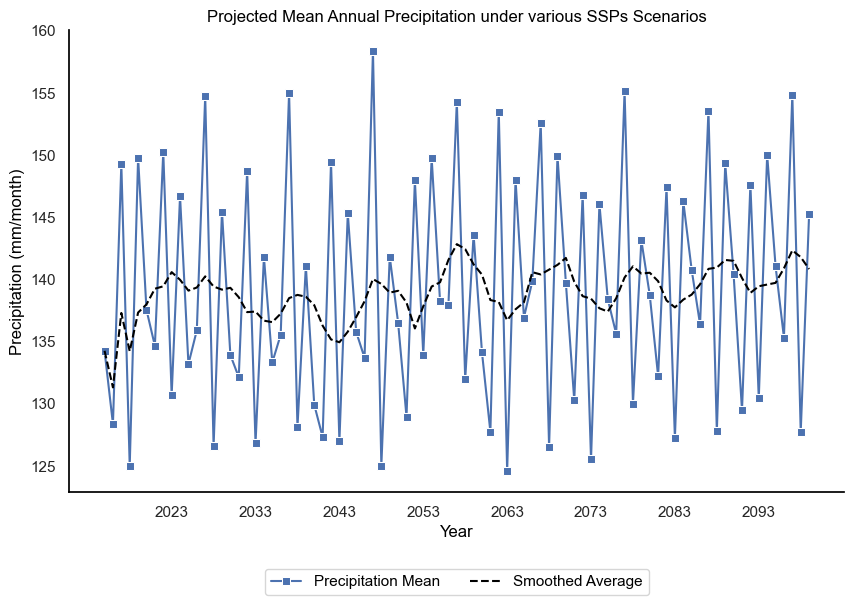

In [63]:
# Custom color list
custom_colors = ['#145DA0']

# Set custom colors as the color palette
sns.set_palette(custom_colors)
# Set the style and font color to black
sns.set(style="whitegrid", rc={"axes.labelcolor": "black", "text.color": "black", "axes.edgecolor": "black"})

# Create a plot using Seaborn with markers and rolling means (without lines)
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=result, x='year', y='mean', label='Precipitation Mean', marker='s',)
ax = sns.lineplot(data=result, x='year', y='Rolling_Mean_Mean',  color='black', linestyle='--', label='Smoothed Average')
sns.despine()  # Remove the spines and grid lines
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/month)')
plt.title('Projected Mean Annual Precipitation under various SSPs Scenarios')
plt.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, -0.15))
plt.xticks(range(2023, 2099, 10))  # Customize x-axis tick labels
# Manually remove the top and right spines using plt
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove grid lines
ax.yaxis.grid(False)
ax.xaxis.grid(False)
plt.show()
